In [3]:
import pandas as  pd

data = pd.read_csv('../02 - Iris/iris.csv')
print(data.head())
print(data.shape)
print(data.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


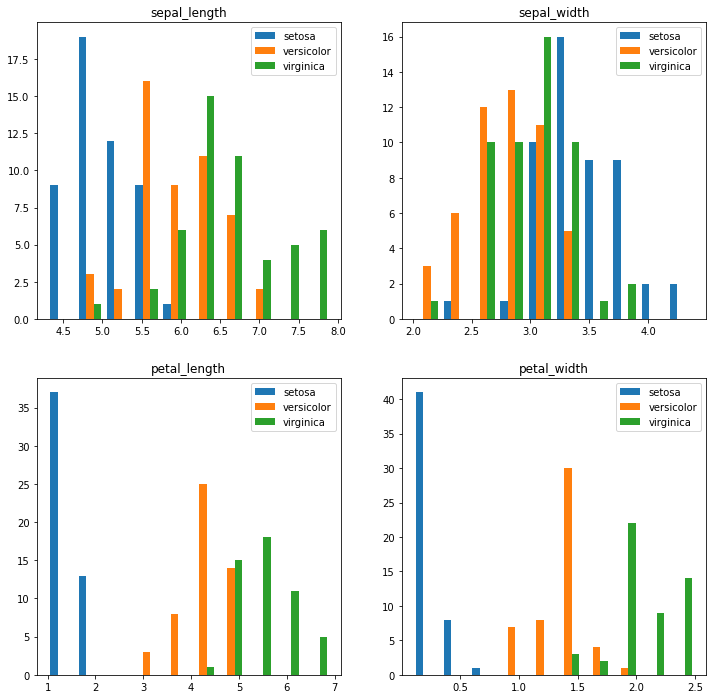

In [5]:
import matplotlib.pyplot as plt

species = data.species.unique().tolist()

fig, ax = plt.subplots(2,2,figsize=(6*2,6*2))

for i, columna in enumerate(data.columns):
    if (columna == "species"): continue
    ax[int(i/2),i%2].hist([data[data['species'] == especie].iloc[:,i] for especie in species])
    ax[int(i/2),i%2].legend(species)
    ax[int(i/2),i%2].set_title(columna)

plt.show()

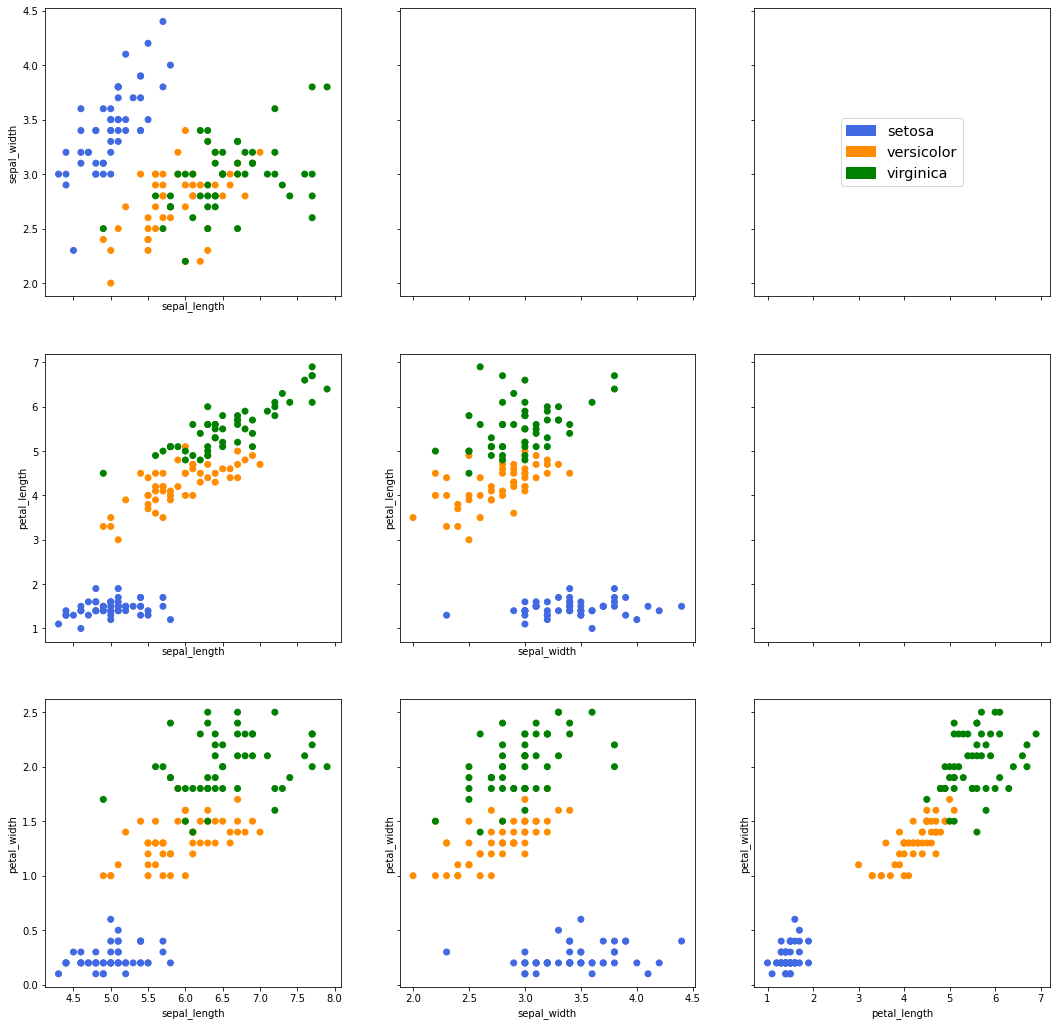

In [59]:
# sns.pairplot(iris, hue='species', size=2.5)

color_map = {'setosa': 'royalblue', 'versicolor': 'darkorange', 'virginica': 'g'}
colors = data.species.map(color_map)


import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=color_map[key], label=key) for key in color_map.keys()]

fig, ax = plt.subplots(3,3,sharex='col',sharey='row',figsize=(6*3,6*3))

for i in range(4):
    for j in range(i):
        x, y = data.iloc[:,j], data.iloc[:,i]
        ax[i-1,j].scatter(x, y, c=colors)
        ax[i-1,j].set_xlabel(x.name)
        ax[i-1,j].set_ylabel(y.name)

ax[0,2].legend(loc='center', handles=handles, labels=species, fontsize='x-large')

plt.show()

In [15]:
# Vamos a usar k-NN! Y probemos con distintos k

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ITERACIONES = 100

for k in range(1,10):
    correctos = 0
    for i in range(ITERACIONES):
        inputs, inputs_test, target, target_test = train_test_split(data.iloc[:,:-1], data.species, test_size=0.33)
        clasificador = KNeighborsClassifier(k)
        clasificador.fit(inputs, target)
        predecidos = clasificador.predict(inputs_test)
        correctos += sum([predecidos.tolist()[i] == target_test.tolist()[i] for i in range(len(target_test))])
    
    correctos_promedio = float(correctos) / ITERACIONES
    print("%i-Nearest Neighbours: %.2f %%" % (k, correctos_promedio / len(target_test) * 100))

1-Nearest Neighbours: 95.38 %
2-Nearest Neighbours: 94.53 %
3-Nearest Neighbours: 95.73 %
4-Nearest Neighbours: 95.54 %
5-Nearest Neighbours: 96.24 %
6-Nearest Neighbours: 95.63 %
7-Nearest Neighbours: 96.22 %
8-Nearest Neighbours: 96.01 %
9-Nearest Neighbours: 96.72 %


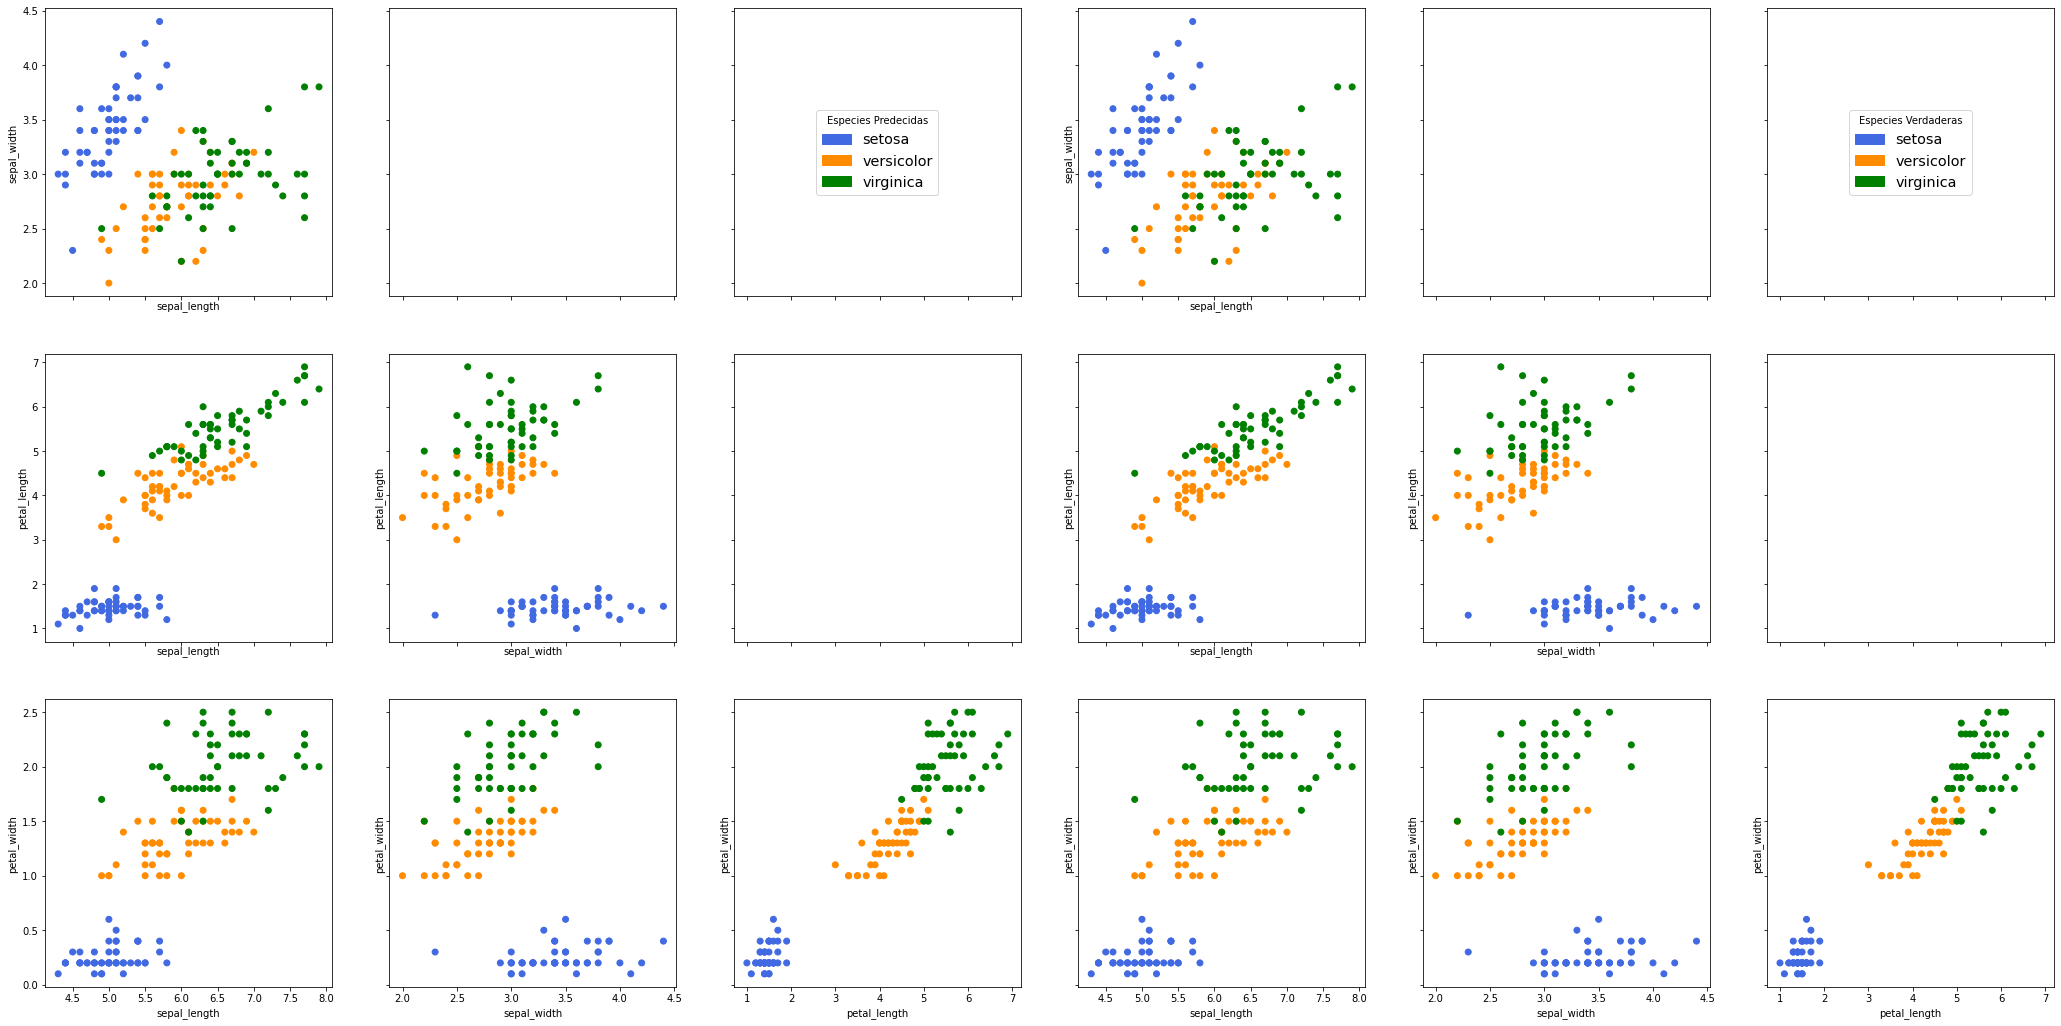

In [51]:
# Grafiquemos un poco

inputs, inputs_test, target, target_test = train_test_split(data.iloc[:,:-1], data.species, test_size=0.33)
clasificador = KNeighborsClassifier(5)
clasificador.fit(inputs, target)

predecidos = clasificador.predict(inputs_test)
colores_verdaderos = [color_map[especie] for especie in target_test]
colores_predecidos = [color_map[especie] for especie in predecidos]

fig, ax = plt.subplots(3,6,sharex='col',sharey='row',figsize=(6*6,6*3))

for i in range(4):
    for j in range(i):
        x, y = data.iloc[:,j], data.iloc[:,i]
        ax[i-1,j].scatter(x, y, c=colors)
        ax[i-1,j].set_xlabel(x.name)
        ax[i-1,j].set_ylabel(y.name)

for i in range(4):
    for j in range(i):
        x, y = data.iloc[:,j], data.iloc[:,i]
        ax[i-1,j+3].scatter(x, y, c=colors)
        ax[i-1,j+3].set_xlabel(x.name)
        ax[i-1,j+3].set_ylabel(y.name)

ax[0,2].legend(loc='center', handles=handles, labels=species, fontsize='x-large', title='Especies Predecidas')
ax[0,5].legend(loc='center', handles=handles, labels=species, fontsize='x-large', title='Especies Verdaderas')

plt.show()